In [481]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [482]:
# read csv using Pandas
df_OG = pd.read_csv('train.csv')
df_x=df_OG.drop('label',axis=1)
df_y=df_OG['label']

In [483]:
labels = df_OG.iloc[:, 0]  # Assuming first column has the labels
print(labels.value_counts())  # Check distribution of digits

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


In [484]:
df_x.shape # 28 times 28 = 784

(42000, 784)

In [485]:
x_no_flat=df_x.values.reshape(-1,28,28,1)

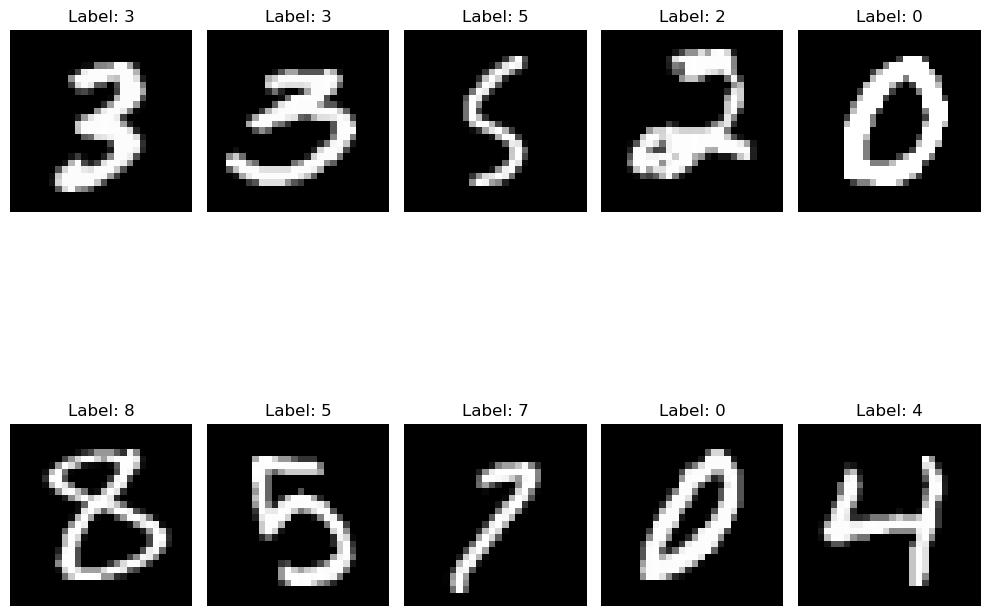

In [486]:
num_images = 10  # Number of images to display
indices = np.random.choice(df_OG.shape[0], num_images, replace=False)
images = x_no_flat[indices]
labels = df_y[indices]

# Create a grid of images
fig, axes = plt.subplots(2, 5, figsize=(10, 10))
for ax, img, label in zip(axes.flatten(), images, labels):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')  # Hide the axes

plt.tight_layout()
plt.show()

In [487]:
####################################################
####################################################
def weights_incialization(units, type_inicilization):
    # inicializar listas vazias:
    Weights = [] 
    Biases = []

    
    if type_inicilization == 'random':
        for i in range(len(units)-1):
            w = 0.1 * np.random.randn(units[i], units[i+1])
            b = 0.1 * np.random.randn(units[i+1]).reshape(-1,1)
            # dá append nas listas:
            Weights.append(w) 
            Biases.append(b)

    elif type_inicilization == 'normal_distribution':
        mu, sigma = 0.1, 0.1**2
        for i in range(len(units)-1):
            w = np.random.normal(mu, sigma, size=(units[i], units[i+1]))
            b = np.random.normal(mu, sigma, size=(units[i+1],1)).reshape(-1,1)
            # dá append nas listas:
            Weights.append(w) 
            Biases.append(b)

    elif type_inicilization == 'zeros':
        for i in range(len(units)-1):
            w = np.zeros((units[i], units[i+1]))
            b = np.zeros(units[i+1]).reshape(-1,1)
            # dá append nas listas:
            Weights.append(w) 
            Biases.append(b)      
    
    else:
        for i in range(len(units)-1):
            w = 0.1 * np.ones((units[i], units[i+1]))
            b = 0.1 * np.ones(units[i+1]).reshape(-1,1)
            # dá append nas listas:
            Weights.append(w) 
            Biases.append(b)        
        
    return Weights, Biases
####################################################
####################################################





####################################################
####################################################
def activation_function(z):
    # Activation function: g(h)=ReLU(h)
    #h = z/2 + np.abs(z)/2
    h = np.maximum(0,z)
    #h = np.clip(z, 0, None)
    
    # Activation function: g(h)=tanh(h) [funcao de ativacao - tangente hiperbolica]
    #h = np.tanh(z) # tanh

    return h
####################################################
####################################################

####################################################
####################################################
def diff_activation_function(z):
    # Derivative of the g(z)=ReLU(z) function
    #g_diff = z
    #g_diff[g_diff>0] = 1
    #g_diff[g_diff<=0] = 0
    
    # Derivada da funçao de ativação (da tanh) 
    #g_diff = 1 - (h)**2
    return z > 0
####################################################
####################################################



####################################################
####################################################
def softmax(z):
    soft = np.exp(z) / np.sum(np.exp(z),axis=0)
    #soft = np.exp(z) / sum(np.exp(z))
    return soft
####################################################
####################################################



####################################################
####################################################
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 10)) # size of Y lines and 10 columns (assume Y is a list)
    one_hot_Y[np.arange(Y.size), Y] = 1
    #one_hot_Y = one_hot_Y.T
    return one_hot_Y
####################################################
####################################################





####################################################
####################################################
def forward(x, Weights, Biases):
    Hiddens = []
    Z = []

    if len(x.shape) == 1:
        x = x.reshape(784,-1)   
    else:
        if x.shape[0]!=784:
            x = x.T

    h_lm1 = x
    for l in range(len(Weights)):
        # Pre-activation:
        z_l = Weights[l].T.dot(h_lm1) + Biases[l]

        # Activation:
        if l == len(Weights)-1: # Output layer
            h_l = softmax(z_l)
        else:
            #funcao de ativacao: ReLu
            h_l = activation_function(z_l)

        Hiddens.append(h_l)
        Z.append(z_l)
        h_lm1 = h_l          
    return Z , Hiddens
####################################################
####################################################






####################################################
####################################################
def backward(x, y, Z, Hiddens, Weights, Biases):


    if len(x.shape) == 1:
        nc = 1 # number of columns
        y = y.reshape(10,-1)
        x = x.reshape(784,-1)   
    else:
        if x.shape[0]!=784:
            x = x.T
        if y.shape[0]!=10:
            y = y.T
        nl , nc = x.shape

    # inicializar listas vazias:
    grad_Weights_of_Loss = []
    grad_Biases_of_Loss = []

    for l in reversed(range(len(Z))): 
        if l == len(Z)-1: # Output layer
            grad_zl_of_Loss = Hiddens[l] - y
            #This matrix multiplication immediately guarantees the correct dimension of the vector:
            grad_Weights_of_Loss.append(1/nc * Hiddens[l-1].dot(grad_zl_of_Loss.T))
            grad_Biases_of_Loss.append(1/nc * np.sum(grad_zl_of_Loss))
        elif l == 0: # -> Input Layer
            grad_zlp1_of_Loss = grad_zl_of_Loss #lp1 (l 'plus' 1) = l+1
            grad_zl_of_Loss = Weights[l+1].dot(grad_zlp1_of_Loss) * diff_activation_function(Z[l])
            #This matrix multiplication immediately guarantees the correct dimension of the vector:
            grad_Weights_of_Loss.append(1/nc * x.dot(grad_zl_of_Loss.T))
            #Here we have to add all the components (columns) of the matrix:
            grad_Biases_of_Loss.append(1/nc * np.sum(grad_zl_of_Loss))
        else:# -> Hidden Layer's:
            grad_zlp1_of_Loss = grad_zl_of_Loss #lp1 (l 'plus' 1) = l+1
            #grad_hl_of_Loss = Weights[l+1]@grad_zlp1_of_Loss
            #g_diff= diff_activation_function(Z[l])
            #grad_zl_of_Loss = grad_hl_of_Loss * g_diff
            grad_zl_of_Loss = Weights[l+1].dot(grad_zlp1_of_Loss) * diff_activation_function(Z[l])
            #This matrix multiplication immediately guarantees the correct dimension of the vector:
            grad_Weights_of_Loss.append(1/nc * Hiddens[l-1].dot(grad_zl_of_Loss.T))
            #Here we have to add all the components (columns) of the matrix:
            grad_Biases_of_Loss.append(1/nc * np.sum(grad_zl_of_Loss))

    grad_Weights_of_Loss.reverse()
    grad_Biases_of_Loss.reverse() 
   
    return grad_Weights_of_Loss, grad_Biases_of_Loss   
####################################################
####################################################



####################################################
####################################################
def update_parameters(Weights, Biases, grad_Weights, grad_Biases, eta):
    num_layers = len(Weights)
    for i in range(num_layers):
        Weights[i] = Weights[i] - eta*grad_Weights[i]
        Biases[i] = Biases[i] - eta*grad_Biases[i]
    return Weights, Biases
####################################################
####################################################

In [488]:
# Negative Log-Likelihood (Cross-Entropy)
####################################################
####################################################
def compute_loss(y_hat, y):
    if len(y.shape) == 1:
        #nc = 1 # number of columns
        y = y.reshape(10,-1)
        y_hat = y_hat.reshape(10,-1)
    else:
        #y_hat = y_hat.reshape(10,-1)
        if y_hat.shape[0]!=10:
            y_hat = y_hat.T
        #y_one_hot = y_one_hot.reshape(10,-1)
        if y.shape[0]!=10:
            y = y.T
    
    #print(y_hat.shape)
    #print(y.shape)
    #print((-y.T.dot(np.log(y_hat))).shape)

    #Loss = np.sum(-y.T.dot(np.log(y_hat)))
    Loss = np.sum(-y*np.log(y_hat))

    return Loss 
####################################################
####################################################





####################################################
####################################################
def predict(h_end):
    return np.argmax(h_end, 0)
####################################################
####################################################






####################################################
####################################################
def accuracy(y, y_hat):

    n_correct = (y == y_hat).sum()
    n_possible = len(y)
    
    accuracy = n_correct / n_possible
    
    return accuracy
####################################################
####################################################







####################################################
####################################################
def training_gradient_descent(x, y, Weights, Biases, learning_rate):

    Z , Hiddens = forward(x,Weights, Biases)
    grad_Weights, grad_Biases = backward( x, y, Z, Hiddens, Weights, Biases)
    Weights, Biases = update_parameters(Weights, Biases, grad_Weights, grad_Biases, learning_rate)

    return Weights, Biases, Z , Hiddens
####################################################
####################################################

In [489]:
x = df_x.to_numpy()
x = x/255 # normalize the data
y = df_y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

y_train_one_hot = one_hot(y_train)
y_test_one_hot = one_hot(y_test)

# NN ARCHITECTURE:
# -> The first 'units' entry is the input size: 784
# -> The entries in the middle of 'units' are the size of the hidden layers: 200
# -> The last entry of 'units' the is output size: 10
units = [784, 200, 10]
# Learning rate
learning_rate = 0.01 


# Initialize all weights and biases randomly.
type_inicialization = 'normal_distribution'
#type_inicialization = 'random'
#type_inicialization = 'zeros'
Weights , Biases = weights_incialization(units, type_inicialization)




train_accuracies = []
test_accuracies = []
Train_Loss = []
Test_Loss = []


EPOCHS = 35
for E in range(EPOCHS):
    print("-> EPOCH:" ,E+1)
    train_loss=0
    test_loss=0

    # -> Mini-Batches train
    '''
    # -> Using all train dataset before update:
    #Nota: O que também dá bons resultados com
    #units = [784, 10, 10]
    #learning_rate = 0.01 
    #EPOCHS = 500
    Weights, Biases, Z , Hiddens = training_gradient_descent(x_train.T, y_train_one_hot.T, Weights, Biases, learning_rate)
    train_loss = compute_loss(Hiddens[-1], y_train_one_hot.T)
    Train_Loss.append(train_loss)
    '''
    # -> updating the parameters in each observation, one by one, in the dataset:\
    #Nota: O que também dá bons resultados com
    #units = [784, 200, 10]
    #learning_rate = 0.01 
    #EPOCHS = 20
    train_loss = 0
    for x_i, y_1hot_i in zip(x_train, y_train_one_hot):
        Weights, Biases, Z , Hiddens = training_gradient_descent(x_i.T, y_1hot_i.T, Weights, Biases, learning_rate)
        #loss = compute_loss(Hiddens[-1], y_train_one_hot.T)
        #train_loss += loss
    Z , Hiddens = forward(x_train.T, Weights, Biases)
    train_loss = compute_loss(Hiddens[-1], y_train_one_hot.T)
    Train_Loss.append(train_loss)



    train_pred = predict(Hiddens[-1])
    train_acc = accuracy(y_train, train_pred)
    train_accuracies.append(train_acc) 

    # -> Test set:
    # Outputs:
    Z , Hiddens = forward(x_test.T, Weights, Biases)
    # Loss:
    test_loss = compute_loss(Hiddens[-1], y_test_one_hot.T)
    Test_Loss.append(test_loss)
    # Accuracy:
    test_pred = predict(Hiddens[-1])
    test_acc = accuracy(y_test, test_pred)
    test_accuracies.append(test_acc) 


    print("Train accuracy = ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test accuracy = ", test_acc)
    print("Test Loss: ", test_loss)
    
    
    

-> EPOCH: 1
Train accuracy =  0.6958630952380952
Train Loss:  35414.24885839671
Test accuracy =  0.6941666666666667
Test Loss:  8987.824545859923
-> EPOCH: 2
Train accuracy =  0.8418452380952381
Train Loss:  19176.1531019212
Test accuracy =  0.8408333333333333
Test Loss:  4960.876582904572
-> EPOCH: 3
Train accuracy =  0.8900892857142857
Train Loss:  13029.28537466797
Test accuracy =  0.8839285714285714
Test Loss:  3528.604378245744
-> EPOCH: 4
Train accuracy =  0.9072619047619047
Train Loss:  11045.590794723224
Test accuracy =  0.9004761904761904
Test Loss:  3132.3034613950836
-> EPOCH: 5
Train accuracy =  0.9208630952380953
Train Loss:  9383.991946127246
Test accuracy =  0.914047619047619
Test Loss:  2776.670401104762
-> EPOCH: 6
Train accuracy =  0.9304464285714286
Train Loss:  8255.684295342393
Test accuracy =  0.9210714285714285
Test Loss:  2570.555251819284
-> EPOCH: 7
Train accuracy =  0.9359226190476191
Train Loss:  7375.578849678339
Test accuracy =  0.924404761904762
Test Loss

<function matplotlib.pyplot.show(close=None, block=None)>

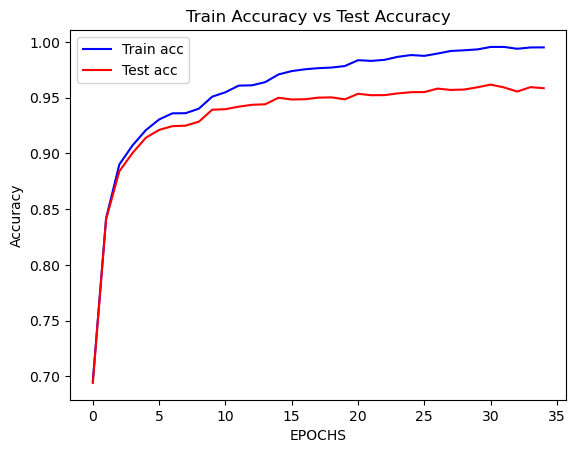

In [490]:
plt.figure()
plt.plot(range(EPOCHS), train_accuracies, 'b-', label='Train acc')
plt.plot(range(EPOCHS), test_accuracies, 'r-', label='Test acc')
plt.ylabel('Accuracy')
plt.xlabel('EPOCHS')
plt.title('Train Accuracy vs Test Accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

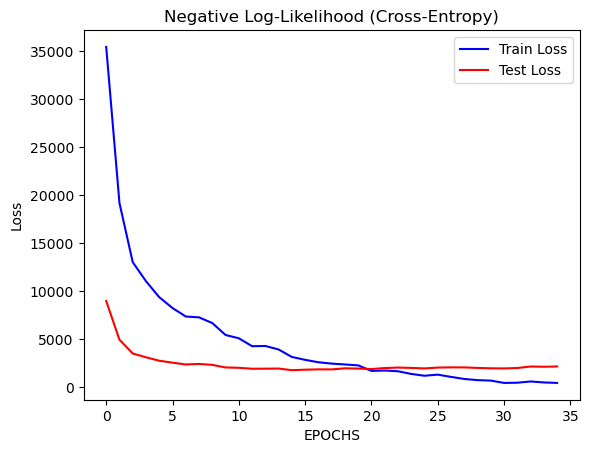

In [491]:
plt.figure()
plt.plot(range(EPOCHS), Train_Loss, 'b-', label='Train Loss')
plt.plot(range(EPOCHS), Test_Loss, 'r-', label='Test Loss')
plt.ylabel('Loss')
plt.xlabel('EPOCHS')
plt.title('Negative Log-Likelihood (Cross-Entropy)')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

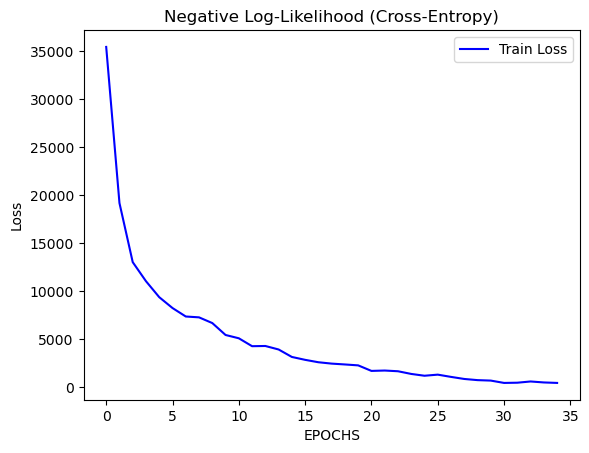

In [492]:
plt.figure()
plt.plot(range(EPOCHS), Train_Loss, 'b-', label='Train Loss')
plt.ylabel('Loss')
plt.xlabel('EPOCHS')
plt.title('Negative Log-Likelihood (Cross-Entropy)')
plt.legend()
plt.show

In [493]:
Z , Hiddens = forward(x.T, Weights, Biases)
pred = predict(Hiddens[-1])


def show_result(x, y, pred, idx):
    print("Prediction: ", pred[idx])
    print("Label: ", y[idx])
    
    current_image = x[idx, : , None]
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()



Prediction:  9
Label:  9


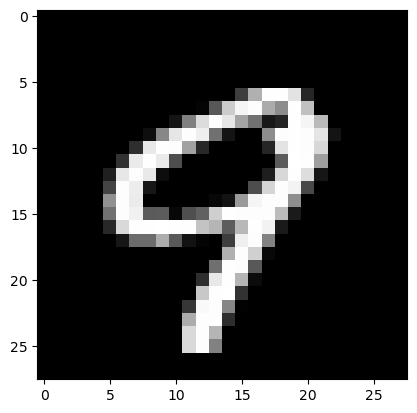

Prediction:  8
Label:  8


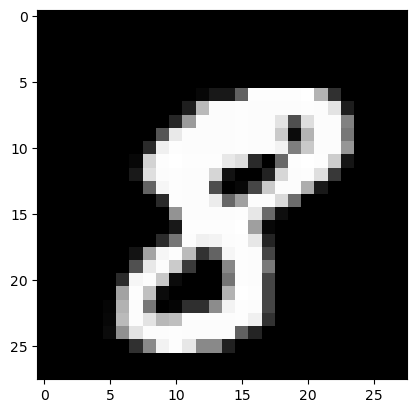

Prediction:  3
Label:  3


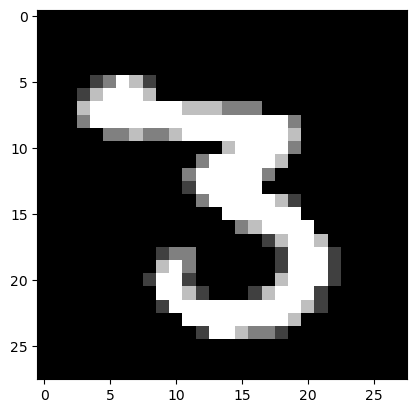

Prediction:  8
Label:  8


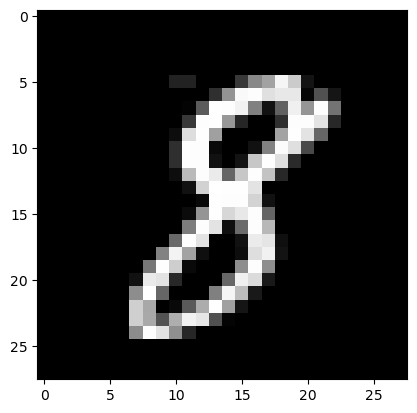

In [494]:

show_result(x, y, pred, 100)
show_result(x, y, pred, 10)
show_result(x, y, pred, 13)
show_result(x, y, pred, 20)

In [495]:
A = 0.1 * np.ones((3,2))
A
B = np.ones((3,2))
B

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [496]:
C = np.sum(A*B)
C

0.6

In [497]:
A = np.array([[1,2],[3,4],[5,6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [498]:
sum(A)

array([ 9, 12])

In [499]:
np.sum(A,axis=0)

array([ 9, 12])

In [500]:
cm = confusion_matrix(y_test, test_pred)
print(cm)

[[804   1   1   1   0   4   5   1   1   3]
 [  0 936   2   9   0   2   3   3   6   1]
 [  3   4 791  10   2   5   3   6   4   1]
 [  0   1   6 821   0  12   1   6   6  11]
 [  2   1   5   0 802   5   8   3   0  30]
 [  2   1   1   6   1 702   4   1   4   7]
 [  9   1   1   1   1  15 809   0   1   1]
 [  0   2   5   0   2   1   0 854   1   8]
 [  5   4   4  10   1  15   4   1 743   6]
 [  6   0   0   3  12   5   0  17   2 789]]


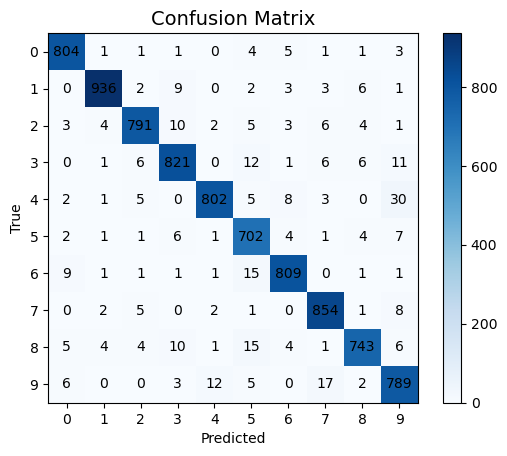

In [501]:


# Gera a matriz de confusão (caso ainda não tenha sido gerada)
cm = confusion_matrix(y_test, test_pred)

# Definindo as labels (ajuste se necessário)
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Cria a figura e os eixos
fig, ax = plt.subplots()

# Cria o mapa de cores da matriz de confusão
cax = ax.matshow(cm, cmap='Blues')

# Adiciona a barra de cores ao lado
plt.colorbar(cax)

# Coloca os rótulos nos eixos x e y na parte inferior
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.xaxis.set_ticks_position('bottom')

# Anota os valores dentro das células
for i in range(len(cm)):
    for j in range(len(cm[i])):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')


# Título do gráfico
plt.title('Confusion Matrix', fontsize=14)

# Define os rótulos dos eixos
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=10)
# Exibe o gráfico
plt.show()
